In [1]:
# %matplotlib
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

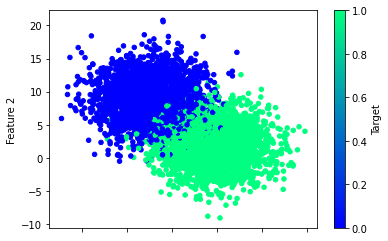

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=5000, centers=2, n_features=2, random_state=42, cluster_std=3)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
118/118 [==============================] - 0s 496us/step - loss: 0.4978 - accuracy: 0.9203
Epoch 2/50
118/118 [==============================] - 0s 462us/step - loss: 0.3454 - accuracy: 0.9400
Epoch 3/50
118/118 [==============================] - 0s 467us/step - loss: 0.2442 - accuracy: 0.9459
Epoch 4/50
118/118 [==============================] - 0s 373us/step - loss: 0.1900 - accuracy: 0.9499
Epoch 5/50
118/118 [==============================] - 0s 402us/step - loss: 0.1618 - accuracy: 0.9501
Epoch 6/50
118/118 [==============================] - 0s 411us/step - loss: 0.1463 - accuracy: 0.9504
Epoch 7/50
118/118 [==============================] - 0s 434us/step - loss: 0.1373 - accuracy: 0.9507
Epoch 8/50
118/118 [==============================] - 0s 392us/step - loss: 0.1320 - accuracy: 0.9509
Epoch 9/50
118/118 [==============================] - 0s 410us/step - loss: 0.1288 - accuracy: 0.9512
Epoch 10/50
118/118 [==============================] - 0s 382us/step - loss: 0.126

In [11]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

40/40 - 0s - loss: 0.1234 - accuracy: 0.9528
Loss: 0.12340505421161652, Accuracy: 0.9527999758720398


<AxesSubplot:>

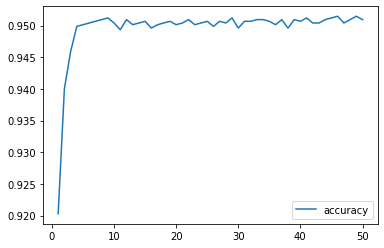

In [12]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")